In [213]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

%reload_ext autoreload
%autoreload 2
%matplotlib inline

NUM_CLASSES = 10
SEED = 1
FIG_SIZE = 8

digits = datasets.load_digits(n_class=NUM_CLASSES)
X = digits.data
y = digits.target

Automatically created module for IPython interactive environment


Text(0.5,1,'A selection from the 64-dimensional digits dataset')

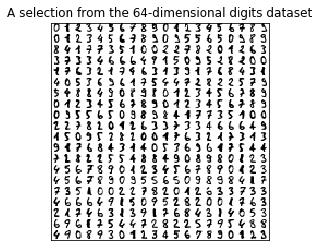

In [214]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

In [215]:
# random projection
rp = random_projection.SparseRandomProjection(n_components=2, random_state=SEED)
X_projected = rp.fit_transform(X)

Computing random projection


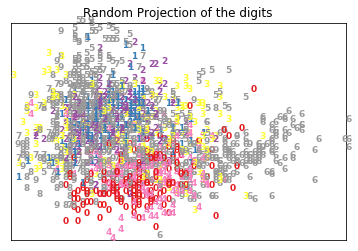

In [216]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] /5.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
print("Computing random projection")
plot_embedding(X_projected, "Random Projection of the digits")

### look at data

In [218]:
X_projected.shape

(1797, 2)

In [219]:
X.shape

(1797, 64)

In [220]:
X_projected[:10]

array([[ -2., -70.],
       [-12.,  -8.],
       [-22., -26.],
       [ 22., -32.],
       [ 10., -60.],
       [ -4., -56.],
       [ 22., -46.],
       [-40., -20.],
       [-28., -82.],
       [-16., -42.]])

In [221]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [222]:
# fig, ax = plt.subplots()
X_projected[:10,0]
# ax.scatter(x, y)

array([ -2., -12., -22.,  22.,  10.,  -4.,  22., -40., -28., -16.])

In [224]:
X_projected[:10,1]

array([-70.,  -8., -26., -32., -60., -56., -46., -20., -82., -42.])

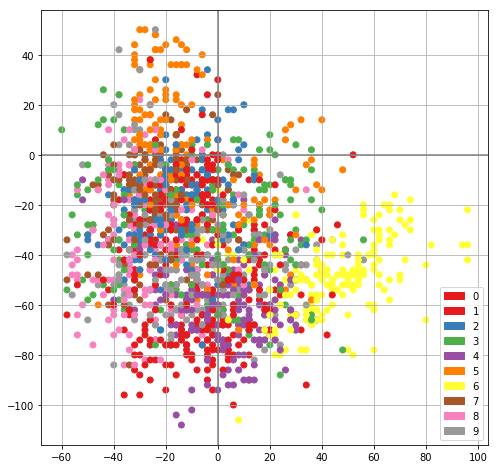

In [225]:
x = X_projected[:,0]
y = X_projected[:,1]

scatter_plot(x, y)

### normalize data and plot again

In [226]:
def get_norm(a):
    mu = np.mean(a)
    sigma = np.std(a)
    x_minus_mu = a - mu
    return x_minus_mu / sigma

In [227]:
x = get_norm(X_projected[:,0])
y = get_norm(X_projected[:,1])

In [230]:
# mean == 0
np.allclose(x.mean(), 0)

True

In [231]:
# std == 1
np.allclose(x.std(), 1)

True

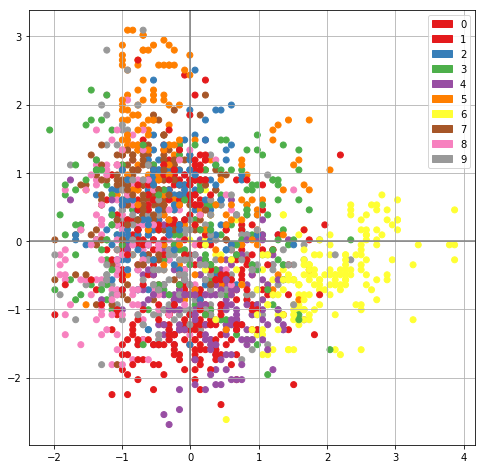

In [232]:
scatter_plot(x, y)

### Sidequest: plot random mean/std normalized `x` , `y` values assigned to `1-10`

In [233]:
M = digits.target.shape
M

(1797,)

In [234]:
mu = 0
sigma = 1
rand_x = np.random.normal(mu, sigma, M)
rand_y = np.random.normal(mu, sigma, M)

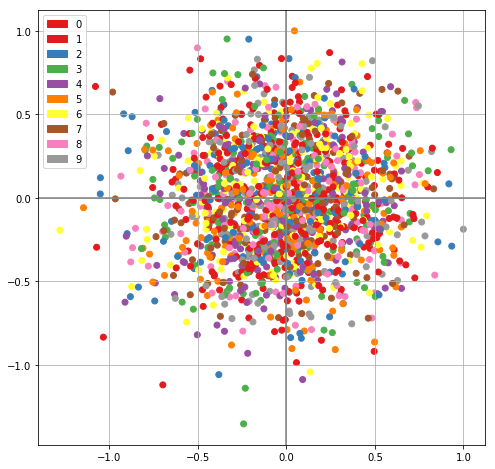

In [236]:
def scatter_plot(x, y):
    fig, ax = plt.subplots()
    fig.set_size_inches(FIG_SIZE, FIG_SIZE)

    color_sequence = plt.cm.Set1(digits.target / 10.)
    patches = [
        mpatches.Patch(color=c, label=digits.target[idx]) for idx, c in \
            enumerate(color_sequence[:NUM_CLASSES])
    ]
    ax.legend(handles=patches)

    # gridlines
    ax.grid()
    ax.axvline(0, color='grey')
    ax.axhline(0, color='grey')

    # plot
    ax.scatter(x, y, color=color_sequence)
    

x = rand_x / rand_x.max()
y = rand_y / rand_y.max()

scatter_plot(x, y)

## T-SNE 

Use TSNE from [scikit-learn](http://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne) example, but with my matplotlib scatterplot

In [237]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=SEED)
X_tsne = tsne.fit_transform(X)

In [238]:
X_tsne.shape

(1797, 2)

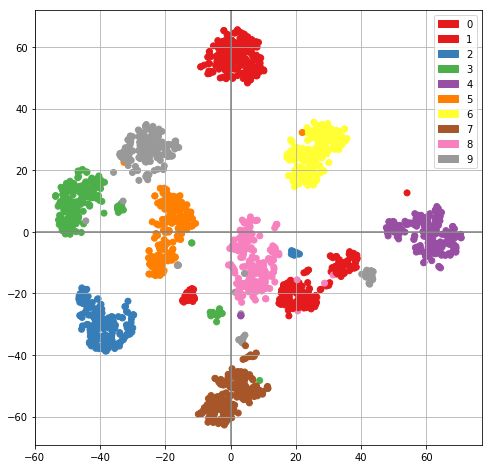

In [239]:
x = X_tsne[:,0]
y = X_tsne[:,1]

scatter_plot(x, y)

### Sidequest #2: Plot using this [stack overflow answer](https://stackoverflow.com/a/7506306/1913888) to see what happens

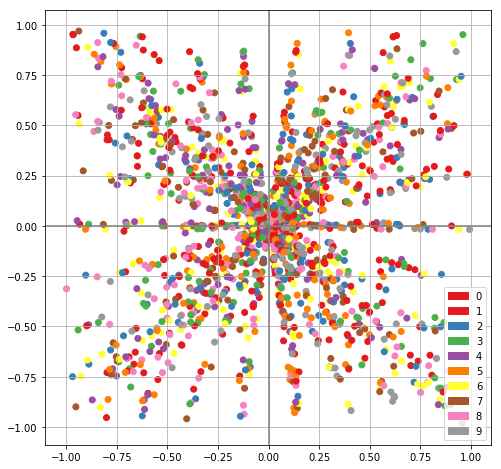

In [241]:
golden = (1 + 5 ** 0.5) / 2
radius = np.r_[0:1:1797j]

x = radius * np.cos(X_projected[:,0]) * np.sin(golden)
y = radius * np.sin(X_projected[:,1]) * np.sin(golden)

scatter_plot(x, y)